# Ford gobike Dataset Exploration
## by Muneaki Umino

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
# Create day and weekday columns
df.start_time = pd.to_datetime(df.start_time)
df['day'] = df.start_time.dt.strftime('%A')

df['weekday'] = df.start_time.dt.weekday.apply(lambda x: 'weekday' if x < 5 else 'weekend')

In [4]:
# Create distance column
from math import radians, cos, sin, asin, sqrt 
def distance(lon1, lat1, lon2, lat2): 
      
    # radians converts from degrees to radians. 
    lon1 = df.start_station_longitude
    lon2 = df.end_station_longitude
    lat1 = df.start_station_latitude
    lat2 = df.end_station_latitude
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
  
    c = 2 * np.arcsin(np.sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    distance = r * c
    return np.float64(round(1000*distance))

df['distance'] = distance(df['start_station_longitude'],
                         df['start_station_latitude'],
                         df['end_station_longitude'],
                         df['end_station_latitude'])

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,day,weekday,distance
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,Sunday,weekend,943.0
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,Sunday,weekend,3070.0
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,Sunday,weekend,0.0
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,Sunday,weekend,1047.0
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,Sunday,weekend,636.0


In [6]:
df.info(),
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  object        
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,distance
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1587.076629
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,1010.395298
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,0.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,900.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1400.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,2072.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,68187.000000


### What is the structure of your dataset?

There are 519700 observations ofdata
Columns of this dataset are:

1. duration_sec(Numeric)
2. start_time (Cross-sectional)
3. end_time  (*Cross-sectional*)
4. start_station_id  (Categorical)
5. start_station_name  (Categorical)
6. start_station_latitude  (*Cross-sectional*)
7. start_station_longitude  (*Cross-sectional*)
8. end_station_id  (Categorical)
9. end_station_name  (Categorical)
10. end_station_latitude  (*Cross-sectional*)
11. end_station_longitude  (*Cross-sectional*)
12. bike_id  (Categorical)
13. user_type  (Categorical)
14. day  (Categorical)
15. weelend  (Categorical)
16. distance  (Numeric)

※Cross_sectional means that column is used to represent one numeric variable by combined with the other column.


### What is/are the main feature(s) of interest in your dataset?

Main future of this dataset is how long, and how much distance customers travel on each bike trip.
I am also interested to see if there is any difference between user types, day of the week, weekdays or weekends.
It is also interesting to see which bike station has more customers.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect `duration_sec`, `user_type` and `day`, `weekend`, `distance` columns bring interesting insight of the dataset.

## Univariate Exploration

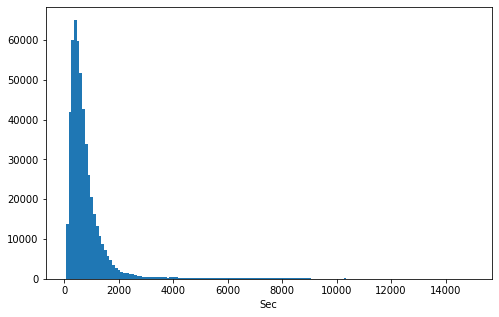

In [7]:
# Let's see how long customers use Gobike
bins = np.arange(61, 15000, 100)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('Sec')
plt.show()

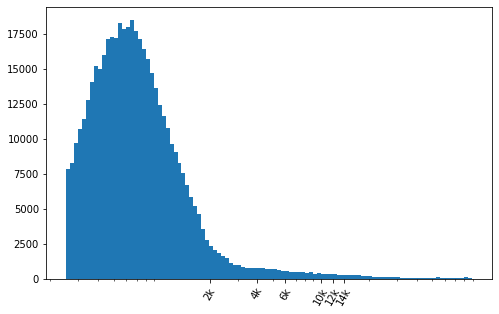

In [8]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([2000, 4000, 6000, 10000, 12000, 14000], ['2k', '4k', '6k', '10k', '12k', '14k'])

plt.xticks(rotation = 60)
plt.show()

It looks like most Gobikers use service for a short time, probably around 1000 seconds.

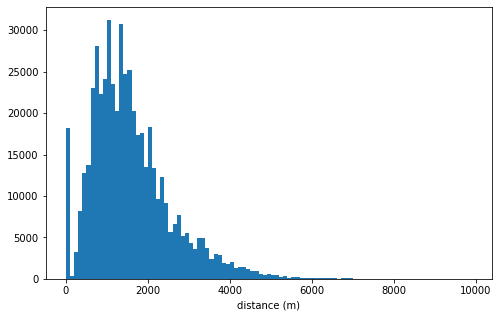

In [9]:
# Let's see distance in the same way
binsize = 15
bins = np.arange(0, 10000, 100)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'distance', bins = bins)
plt.xlabel('distance (m)')
plt.show()

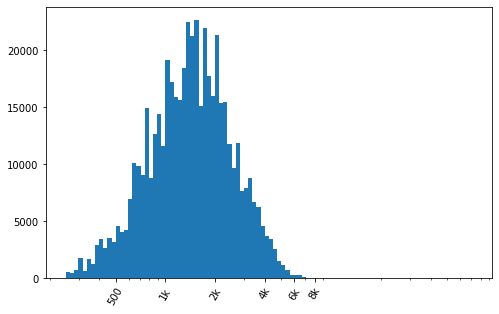

In [10]:
# there's a long tail in the distribution again, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['distance'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'distance', bins = bins)
plt.xscale('log')
plt.xticks([500, 1000, 2000, 4000, 6000, 8000], ['500', '1k', '2k', '4k', '6k', '8k'])

plt.xticks(rotation = 60)
plt.show()

It looks like most Gobikers driving distance are short. It is around 1km, which is 0.6 miles.

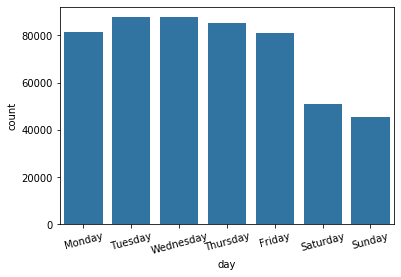

In [11]:
# Is there any difference between days?
level_order = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
category_order = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df['day'] = df['day'].astype(category_order)

base_color = sb.color_palette()[0]
plt.xticks(rotation = 15)
sb.countplot(data = df, x = 'day', color = base_color);

There is a big difference, I can clearly see there are more Gobikers on weekdays. that means they probably use Gobike for commute to work on weekdays than sightseeing on weekends.

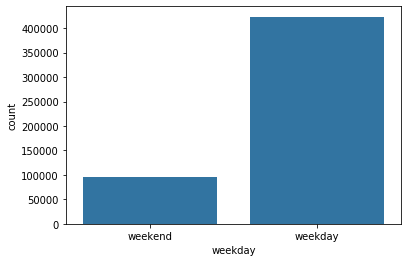

In [12]:
base_color = sb.color_palette()[0]
sb.countplot(data = df , x = 'weekday', color = base_color);

Seeing weekday users and weekend users show much obvious difference.

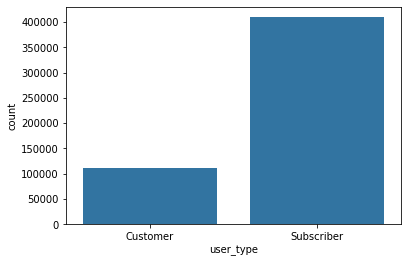

In [13]:
base_color = sb.color_palette()[0]
sb.countplot(data = df , x = 'user_type', color = base_color);

There are more Subscribers. That means there are more people use Gobike regularly.\
Probbaly those subscribers are commuters.\
This gragh is almost identical to the weekend users and weekday users graph.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The `duration_sec` and `distance` column had a large gap between maximum value and minimum value, so I used log scale in order to see informations clearly.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There are clear difference between weekdays users and weekend users, also customers(one-time users) and subscribers.
I made `day` column to see which day of the week based on customer's start time. By plotting this column, I was able to see a clear difference between weekend users and weekday users.

## Bivariate Exploration

In [15]:
numeric_vars = ['duration_sec', 'distance']
categoric_vars = ['day', 'weekday', 'user_type']

In [ ]:
tick_locs = [10000, 20000, 4000, 6000, 8000, 10000]
plt.yticks(tick_locs, tick_locs)
g = sb.regplot(data = df, x = 'duration_sec', y = 'distance',
          x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/5});
g.set(ylim=(0, 10000));

I expected duration and distance are correlated much more, but they is no strong correlation. \
Let's test the log scale.

In [ ]:
# log transform on duration axis

plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'duration_sec', y = 'distance', alpha = 1/50)

plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('distance')
plt.xlabel('duration')
plt.ylim(0,10000)
plt.show()

Most customers use Gobike up tp 1500 seconds (25min) and 4000m (2.5mile).\
This data indicates customers use Gobike for short and quick trip.\
Now, let's take a look at relationships between numerical values and categorical values.

In [ ]:
# Distance, duration vs. day
plt.figure(figsize = [10, 10])

plt.subplot(2, 1, 1)

base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'distance', y = 'day', color = base_color)
plt.xlim(0, 3000)

plt.subplot(2, 1, 2)

sb.boxplot(data = df, x = 'duration_sec', y = 'day', color = base_color)
plt.xlim(0, 3000)

For distance, customers drive distance are almost same for all week.\
But there is a clear difference between weekday and weekend customers when you look at duration.\
That means customers use Gobike from Monday to friday have specific destinations.\
Customers use Gobike on weekends look like they are wondering around the city.

In [ ]:
# Distance, duration vs. weekday
plt.figure(figsize = [10, 10])

plt.subplot(2, 1, 1)

base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'distance', y = 'weekday', color = base_color)
plt.xlim(0, 3000)

plt.subplot(2, 1, 2)

sb.boxplot(data = df, x = 'duration_sec', y = 'weekday', color = base_color)
plt.xlim(0, 3000)

It became clearer that customers drive shorter distance, shorter time on weekdays,\
and drive longer distance, longer time on weekends.

In [ ]:
# Distance, duration vs. user_type

plt.figure(figsize = [10, 10])

plt.subplot(2, 1, 1)

base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'distance', y = 'user_type', color = base_color)
plt.xlim(0, 3000)

plt.subplot(2, 1, 2)

sb.boxplot(data = df, x = 'duration_sec', y = 'user_type', color = base_color)
plt.xlim(0, 3000)

When you look at duration and distance with `user_type`, the difference is more obvious.\
Subscriber drive shorter distance, and much quicker.

In [ ]:
#Relationship between categorical values

plt.figure(figsize = [12, 6])
plt.subplot(1,2,1)
sb.countplot(data = df, x = 'day', hue = 'user_type', palette = 'Blues')
plt.xticks(rotation = 30)

plt.subplot(1,2,2)
sb.countplot(data = df, x = 'weekday', hue = 'user_type', palette = 'Blues');

By looking at this result,now I am confident to say there are customers use Gobike to commute their workplace on weekdays.\
They subscribe Gobike to commute, that's why there are more users on weekdays.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

`Duration` and `distance` have slight correlation at first, but usung log scale, the relationship became more obvious.(An approximately linear relationship was observed when `duration` was plotted on a log scale) This scatterplot suggested most customers use Gobike for short and quick trip in the city. 
There was also interesting relationship between `duration`, `distance` and `day`, `weekday`, `user_type`.Customers drive almost same distance from Monday to Sunday but much longer dulation on weekends. That indicates ther are customers use Gobike for commute on weekdays, sightseeing on weekends. When I look at the relationship between categorical values, I became more confident on this idea because there are much more subscriber use Gobike on weekdays than weekends. This is a clear sign of customer use Gobike for commute on weekdays for short and quick commute, after getting off metro.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I was able to find relationships I expected from the database. There are outliers that I wasn't able to get information, but since I was able to find  correlation between numerical values and categorical values, they won't be explored further.

## Multivariate Exploration

Now, let's explore the database deeper to see how the three categorical measures play into the relationship between duration and distance.

In [ ]:
# Difference between customer and subscriber: using weekday and duration, distance
plt.figure(figsize = [12, 6])

plt.subplot(1, 2, 1)
ax = sb.barplot(data = df, x = 'day', y = 'duration_sec', hue = 'user_type')
ax.legend(loc = 2, ncol = 3, framealpha = 1, title = 'duration')
plt.xticks(rotation = 30)

plt.subplot(1, 2, 2)
ax = sb.pointplot(data = df, x = 'user_type', y = 'distance', hue = 'day',
                  dodge = 0.3, linestyles = "");

The plot on the left describes subscriber spend much less time than customer.\
Also, the plot on the right indicates travel distances are longer on Monday to Friday for both customer and subscriber because they use Gobike for commute.\
Now it is obvious that subscriber know where they want to go, and they are using Gobike service to commute specific locations(stations, companies or schools).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

By doing first multivariate exploration(Bar chart), I am pretty sure subscriber use Gobike for commute because they spend much less time than customers on any day. That means subscribers know where they are going.\
And second chart(Line plot) strengthened my guessing even more, it shows travel distance for both customers and subscrivers are higher on weekdays. This trend clearly be seen especially on subscriber side. 

### Were there any interesting or surprising interactions between features?

I did not expect `duretion` increase on weekends for subscriber. I assume subscribers use Gobike on dayly basis, not only for commuting but also going anywhere. They probably live right beside of Gobike stations, and use it for shopping or something.